In [1]:
"""
This is an under development program.
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import os

In [10]:
files = !ls E*.txt

hora = np.array(list(open("list.txt","r")))

for i in range(len(hora)):
    hora[i] = hora[i][:-1]

print(hora)
print(files)

['1:00' '' '1:00' '' '1:00' '' '1:00' '' '1:00' '' '1:00' '' '1:00' ''
 '1:00' '' '1:00' '' '1:00' '' '1:00' '' '1:00' '' '1:00' '' '1:00']
['"ls" no se reconoce como un comando interno o externo,', 'programa o archivo por lotes ejecutable.']


In [3]:
type(files[0])
type(str(hora[0]))

str

In [9]:
for fil,hor in zip(files,hora):
    #Se lee el archivo de origen

    data = pd.read_csv(fil, sep=" ", header=None)
    data.columns = ["a", "b"]

    # Se convierten los archivos del data a valores
    ds = data.values
    #print(ds)


    # Se generan los datos , se utilizan los cuantiles de los 1530 datos, 85 cuantiles seleccionan 18 valores maximo
    c=0;
    k = 0;
    quantil = []
    quantil2 = []

    ultimoX = []
    ultimoY = []

    OriginalX = []
    OriginalY = []

    for j in range(len(ds)):
        OriginalX.append(ds[j][0])
        OriginalY.append(ds[j][1]) 

        for i in range(len(ds)):
            if(i // 85 == k):
                quantil.append(ds[c][0])
                quantil2.append(ds[c][1])  
                c=c+1


        k=k+1

        quantil2.sort()
       # print(quantil)
        if(quantil2 != []): ultimoY.append(quantil2[-1])
        quantil2 = []


    #print(ultimoY)


    #print(OriginalY)
    Xcoordinate = []
    Ycoordinate = []

    for i in range(len(ultimoY)):

        for j in range(len(OriginalY)):
            if(ultimoY[i] == OriginalY[j]):
                #print(OriginalX[j],OriginalY[j])
                Xcoordinate.append(OriginalX[j])
                Ycoordinate.append(OriginalY[j]) 


    #print(Xcoordinate, Ycoordinate)

    #print(data)
    #me dice el numero de filas por columnas
    #data.shape
    data.plot(x='a',y='b',color='red',marker='.',linestyle='dashed',linewidth=0,markersize=2.0, label=hor)
    plt.plot(Xcoordinate, Ycoordinate, color='blue',marker='.',linewidth=0)
    plt.tight_layout()
    plt.show()

    # SE REALIZA EL AJUSTE LINEAL
    slope, intercept, r_value, p_value, std_err = stats.linregress(Xcoordinate, Ycoordinate)
    #print("slope: %f    intercept: %f" % (slope, intercept))
    #print("R-squared: %f" % r_value**2)
    pendiente = np.zeros(len(Xcoordinate))+slope
    corte = np.zeros(len(Xcoordinate))+intercept
    #print(pendiente,corte)
    data.plot(x='a',y='b',color='red',marker='.',linewidth=0,markersize=1.5,label=hor)
    plt.xlabel("Pixeles")
    plt.ylabel("Cuentas")
    plt.legend(loc='upper right')
    plt.title("Espectro "+str(fil)[1:-4])
    plt.plot(Xcoordinate, Ycoordinate, color='black',marker='.',linewidth=0, label=hor)
    plt.plot(Xcoordinate, corte + pendiente*Xcoordinate,color='blue',linewidth=1, label=hor)
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+".pdf",dpi=600)
    plt.show()



    #SE VUELVE A LLENAR LA LISTA CON EL FIN DE GENERAR DE NUEVO LA GRAFICA DE LA NORMALIZACION
    OriginalX = []
    OriginalY = []

    for j in range(len(ds)):
        OriginalX.append(ds[j][0])
        OriginalY.append(ds[j][1]) 

    p1=np.zeros(len(OriginalX))+slope
    c1=np.zeros(len(OriginalX))+intercept

    #print(c1+p1*OriginalX)
    NormY = c1+p1*OriginalX
    NewY = OriginalY/NormY
    print(len(OriginalX))
    print(len(NewY))
    plt.plot(OriginalX, NewY,color='blue', label=hor,marker='.',markersize=1.5,linewidth=0.5)
    plt.xlabel("Pixeles")
    plt.ylabel("Cuentas")
    plt.legend(loc='lower right')
    plt.title("Espectro "+str(fil)[1:-4])
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+"_Norm"+".pdf",dpi=600)
    plt.show()

FileNotFoundError: File b'"ls" no se reconoce como un comando interno o externo,' does not exist

In [5]:
print(NewY)

NameError: name 'NewY' is not defined

[ -2.02692658  22.69741826 -59.11514592]
[-2.0269265829141503]
[22.697418264924544]
5.59897394811
[ 8.9052102   5.66059299  0.70059492]


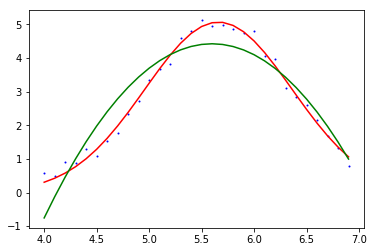

In [8]:
data = loadtxt('model1d_gauss.dat')
#print(data)
xgauss = data[:, 0]
ygauss = data[:, 1]

def gaussian(L, a, c, w):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (a / (sqrt(2*pi) * w)) * exp(-(L-c)**2 / (2*w**2))
def cuadratic(L, A, B, C):
    return (A*L*L+B*L+C)
poptc, pcovc = curve_fit(cuadratic, xgauss, ygauss, maxfev=10000)
print(poptc)
A = [poptc[0]]
B = [poptc[1]]
print(A)
print(B)

vertice = -22.69741826/(2*(-2.02692658))
vertice = -B[0]/(2.0*A[0])
print(vertice)

#print(OriginalX)
#print(NewY)
popt, pcov = curve_fit(gaussian, xgauss, ygauss, maxfev=10000)
print(popt)
plt.plot(xgauss, ygauss,color='blue', label=hor,marker='.',markersize=2.0,linewidth=0)
plt.plot(xgauss, gaussian(xgauss, *popt), 'r-')
plt.plot(xgauss, cuadratic(xgauss, *poptc),color='green')
plt.show()

In [25]:
import numpy as np
OriginalXX = np.array([0, 2])
NewYY = np.array([3, 4])

normdat = open ('test.txt','w')

for K in range(len(OriginalXX)):
    
    normdat.write(str(OriginalXX[K]))
    normdat.write(" ")
    normdat.write(str(NewYY[K]))
    normdat.write("\n")

normdat.close()